In [53]:
import tweepy
import os
import wget
from dotenv import load_dotenv
from tensorflow.keras.models import load_model
from face_detection import *
from dictionarys import emotion_numbers
import matplotlib.pyplot as plt

load_dotenv()
auth = tweepy.OAuthHandler(os.getenv("TWITTER_API_KEY"),os.getenv("TWITTER_API_SECRET") )
auth.set_access_token( os.getenv("ACCESS_TOKEN"), os.getenv("ACCESS_TOKEN_SECRET"))
api = tweepy.API(auth)

In [54]:
from face_detection import *
sentiment_analysis=load_model(filepath="models/model_complex_with_data_augmentation_rotatation_25degrees.h5",compile=True)    

In [ ]:
%matplotlib inline

import wget
from face_detection import *
import os
from dictionarys import emotion_numbers
import matplotlib.pyplot as plt

for status in api.mentions_timeline():
    try:
        url=status._json["entities"]["media"][0]["media_url"]
        image=wget.download(url)
        face=face_detection(image)
        sentiment=sentiment_analysis.predict_classes(face)[0]
        print(emotion_numbers[sentiment])
        plt.imshow(face.reshape((48,48)),cmap="gray")
        plt.show()
        os.remove(image)
        os.chdir("../..")
    except:
        print("This tweet has no picture attached")

In [55]:
from __future__ import absolute_import, print_function

from tweepy import OAuthHandler, Stream, StreamListener
import json
a=[]
class StdOutListener(StreamListener):
    """ A listener handles tweets that are received from the stream.
    This is a basic listener that just prints received tweets to stdout.
    """
    def on_data(self, data):
        try:
            tweet=json.loads(data)
            url=tweet["entities"]["media"][0]["media_url"]
            image=wget.download(url)
            face=face_detection(image)
            sentiment=sentiment_analysis.predict_classes(face)[0]
            print(emotion_numbers[sentiment])
            plt.imshow(face.reshape((48,48)),cmap="gray")
            plt.show()
            os.remove(image)
        except:
            print("This tweet has no picture attached")
        return True

    def on_error(self, status):
        print(status)



        

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Neutral


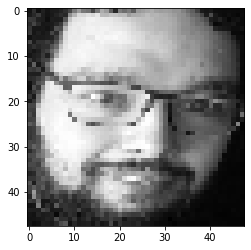

This tweet has no picture attached


KeyboardInterrupt: 

In [56]:
l = StdOutListener()
auth = tweepy.OAuthHandler(os.getenv("TWITTER_API_KEY"),os.getenv("TWITTER_API_SECRET") )
auth.set_access_token( os.getenv("ACCESS_TOKEN"), os.getenv("ACCESS_TOKEN_SECRET"))
stream = Stream(auth, l)
stream.filter(track=["@whatsup_buddy"])

In [50]:
x=json.loads(a[0])

In [51]:
x

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue May 19 17:27:03 +0000 2020',
 'display_text_range': [0, 22],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/pRWNhJNodH',
    'expanded_url': 'https://twitter.com/Whatsupbuddypr1/status/1262796926283665408/photo/1',
    'id': 1262796910781399040,
    'id_str': '1262796910781399040',
    'indices': [23, 46],
    'media_url': 'http://pbs.twimg.com/media/EYZbGYqWAAAoC3v.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EYZbGYqWAAAoC3v.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 944},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 553},
     'small': {'h': 680, 'resize': 'fit', 'w': 313},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/pRWNhJNodH'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1261982395080867840,
    'id_str': '1261982395080867840',
    'indices': [0, 14],
    'name': "What's up buddy?",

In [52]:
x["entities"]["media"][0]["media_url"]

'http://pbs.twimg.com/media/EYZbGYqWAAAoC3v.jpg'